In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme()

params = {
    "font.family": "serif",  # Use default serif font
    "axes.titlesize": "large",
    "axes.labelsize": "large",
    "xtick.labelsize": "medium",
    "ytick.labelsize": "medium",
    "legend.fontsize": "medium"
    # Do not include "text.usetex": True
}
plt.rcParams.update(params)

tab10 = sns.color_palette("tab10")

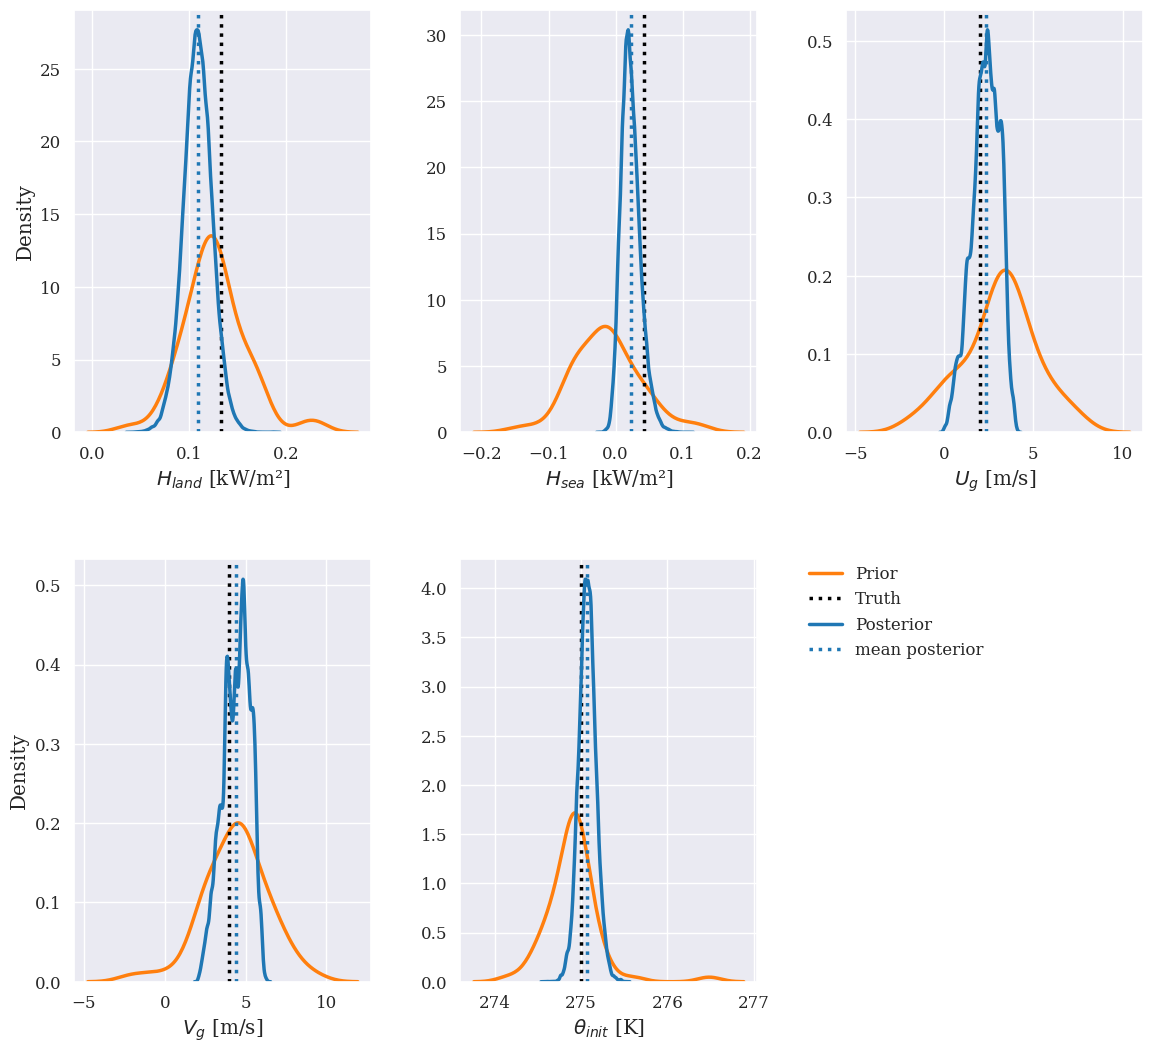

In [28]:
prior_data_synth = pd.read_csv('../Data/Priors/priors_synthetic_truth2.csv', index_col=0) 

prior_data_synth.columns = prior_data_synth.columns.str.strip()

syn_data = pd.read_csv(f'../Data/Posteriors/MCMC_Chains_Synth.csv')
syn_data.columns = syn_data.columns.str.strip()

fig, axes = plt.subplots(2, 3, figsize=(12, 11))

cmap = plt.get_cmap('viridis') 

st_land = 0.132791
st_sea = 0.041819
st_u =  2.0
st_v = 4.0
st_temp = 275

mean_land = 0.109026
mean_sea = 0.022878
mean_u = 2.316602
mean_v = 4.436426
mean_temp = 275.070641

# Prior data
sns.kdeplot(data=prior_data_synth['shf_land'], ax=axes[0,0], color=tab10[1], linewidth=2.5)
sns.kdeplot(data=prior_data_synth['shf_sea'], ax=axes[0,1], color=tab10[1], linewidth=2.5)
sns.kdeplot(data=prior_data_synth['ug_surface'], ax=axes[0,2], color=tab10[1], linewidth=2.5)
sns.kdeplot(data=prior_data_synth['vg_surface'], ax=axes[1,0], color=tab10[1], linewidth=2.5)
sns.kdeplot(data=prior_data_synth['pt_surface'], ax=axes[1,1], label='Prior', color=tab10[1], linewidth=2.5)

axes[0,0].axvline(x=st_land, color="black", linestyle="dotted", linewidth=2.5)
axes[0,1].axvline(x=st_sea, color="black", linestyle="dotted", linewidth=2.5)
axes[0,2].axvline(x=st_u, color="black", linestyle="dotted", linewidth=2.5)
axes[1,0].axvline(x=st_v, color="black", linestyle="dotted", linewidth=2.5)
axes[1,1].axvline(x=st_temp, color="black", linestyle="dotted", linewidth=2.5, label='Truth' )


# Posterior data
sns.kdeplot(data=syn_data['shf_land'], ax=axes[0,0], color=tab10[0], linewidth=2.5)
sns.kdeplot(data=syn_data['shf_sea'], ax=axes[0,1], color=tab10[0], linewidth=2.5)
sns.kdeplot(data=syn_data['ug_surface'], ax=axes[0,2], color=tab10[0], linewidth=2.5)
sns.kdeplot(data=syn_data['vg_surface'], ax=axes[1,0], color=tab10[0], linewidth=2.5)
sns.kdeplot(data=syn_data['pt_surface'], ax=axes[1,1], label='Posterior', color=tab10[0], linewidth=2.5)

axes[0,0].axvline(x=mean_land, color=tab10[0], linestyle="dotted", linewidth=2.5)
axes[0,1].axvline(x=mean_sea, color=tab10[0], linestyle="dotted", linewidth=2.5)
axes[0,2].axvline(x=mean_u, color=tab10[0], linestyle="dotted", linewidth=2.5)
axes[1,0].axvline(x=mean_v, color=tab10[0], linestyle="dotted", linewidth=2.5)
axes[1,1].axvline(x=mean_temp, color=tab10[0], linestyle="dotted", linewidth=2.5, label='mean posterior' )

# Set axis labels
axes[0,0].set_xlabel(r'$H_{land}$ [kW/m²]')
axes[0,1].set_xlabel(r'$H_{sea}$ [kW/m²]')
axes[0,2].set_xlabel(r'$U_{g}$ [m/s]')
axes[1,0].set_xlabel(r'$V_{g}$ [m/s]')
axes[1,1].set_xlabel(r'$\theta_{init}$ [K]')

for ax in axes[0,:]:
    ax.set_ylabel('') 
for ax in axes[1,:]:
    ax.set_ylabel('') 

axes[0,0].set_ylabel('Density')
axes[1,0].set_ylabel('Density')

axes[1,2].axis('off')

plt.tight_layout(pad=2.0)
plt.subplots_adjust(wspace=0.3, hspace=0.3)  

axes[1,1].legend(
    loc='upper left',              
    bbox_to_anchor=(1.15, 1),      
    borderaxespad=0,               
    frameon=False                  
)

#fig.suptitle("", fontsize=16)
plt.savefig('../Tables_and_Figures/Synth_MCMC.png', format='png', dpi=500, bbox_inches='tight')

plt.show()


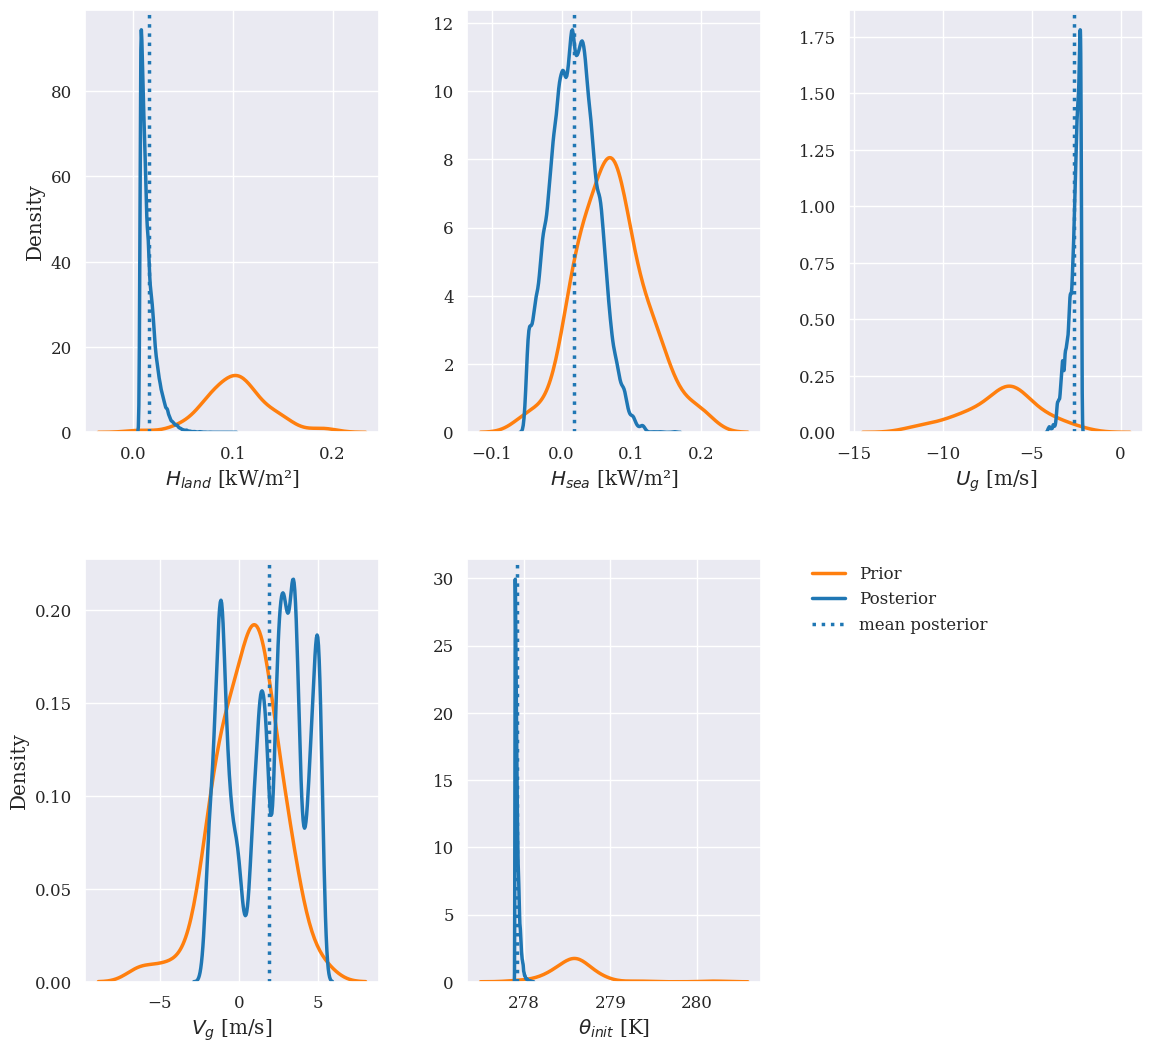

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
prior_data_flight21 = pd.read_csv('../Data/Priors/priors_flight_21.csv', index_col=0) 
prior_data_flight21.columns = prior_data_flight21.columns.str.strip()

flight21_data = pd.read_csv('../Data/Posteriors/MCMC_Chains_Flight21.csv')
flight21_data.columns = flight21_data.columns.str.strip()

# Set up the figure
fig, axes = plt.subplots(2, 3, figsize=(12, 11))

# Create your plots
cmap = plt.get_cmap('viridis')

mean_land = 0.015318
mean_sea = 0.017566
mean_u = -2.627647
mean_v = 1.897015
mean_temp = 277.922475

# Prior
sns.kdeplot(data=prior_data_flight21['shf_land'], ax=axes[0,0], color=tab10[1], linewidth=2.5)
sns.kdeplot(data=prior_data_flight21['shf_sea'], ax=axes[0,1], color=tab10[1], linewidth=2.5)
sns.kdeplot(data=prior_data_flight21['ug_surface'], ax=axes[0,2], color=tab10[1], linewidth=2.5)
sns.kdeplot(data=prior_data_flight21['vg_surface'], ax=axes[1,0], color=tab10[1], linewidth=2.5)
sns.kdeplot(data=prior_data_flight21['pt_surface'], ax=axes[1,1], label='Prior', color=tab10[1], linewidth=2.5)

# Flight 21 posterior data
sns.kdeplot(data=flight21_data['shf_land'], ax=axes[0,0], color=tab10[0], linewidth=2.5)
sns.kdeplot(data=flight21_data['shf_sea'], ax=axes[0,1], color=tab10[0], linewidth=2.5)
sns.kdeplot(data=flight21_data['ug_surface'], ax=axes[0,2], color=tab10[0], linewidth=2.5)
sns.kdeplot(data=flight21_data['vg_surface'], ax=axes[1,0], color=tab10[0], linewidth=2.5)
sns.kdeplot(data=flight21_data['pt_surface'], ax=axes[1,1], label='Posterior', color=tab10[0], linewidth=2.5)

axes[0,0].axvline(x=mean_land, color=tab10[0], linestyle="dotted", linewidth=2.5)
axes[0,1].axvline(x=mean_sea, color=tab10[0], linestyle="dotted", linewidth=2.5)
axes[0,2].axvline(x=mean_u, color=tab10[0], linestyle="dotted", linewidth=2.5)
axes[1,0].axvline(x=mean_v, color=tab10[0], linestyle="dotted", linewidth=2.5)
axes[1,1].axvline(x=mean_temp, color=tab10[0], linestyle="dotted", linewidth=2.5, label='mean posterior' )

# Set axis labels
axes[0,0].set_xlabel(r'$H_{land}$ [kW/m²]')
axes[0,1].set_xlabel(r'$H_{sea}$ [kW/m²]')
axes[0,2].set_xlabel(r'$U_{g}$ [m/s]')
axes[1,0].set_xlabel(r'$V_{g}$ [m/s]')
axes[1,1].set_xlabel(r'$\theta_{init}$ [K]')

for ax in axes[0,:]:
    ax.set_ylabel('') 
for ax in axes[1,:]:
    ax.set_ylabel('') 

axes[0,0].set_ylabel('Density')
axes[1,0].set_ylabel('Density')

axes[1,2].axis('off')

# Adjust layout
plt.tight_layout(pad=2.0)
plt.subplots_adjust(wspace=0.3, hspace=0.3) 

axes[1,1].legend(
    loc='upper left',              
    bbox_to_anchor=(1.15, 1),      
    borderaxespad=0,               
    frameon=False                 
)

#fig.suptitle("", fontsize=16)
plt.savefig('../Tables_and_Figures/Flight21_MCMC.png', format='png', dpi=500, bbox_inches='tight')

plt.show()
